Repeating Script Every Hour
-------

To make the script more powerful I will set it to update every hour, 3600 seconds.

The data itself is updated every 5 minutes so this seems a sensible refresh rate.

I begin by making the plot into a function:

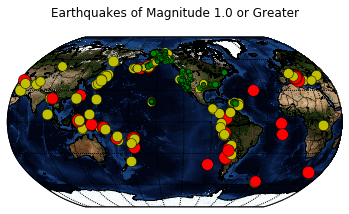

In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas import Series, DataFrame
import pandas as pd

def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

def Earthquake():
    data = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv')
    reader = DataFrame(data,columns = ['latitude','longitude','mag'])

    lats, lons, mags = [], [], []

    lats = reader["latitude"].tolist()
    lons = reader["longitude"].tolist()
    magnitudes = reader["mag"].tolist()
    
    eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
    eq_map.drawcoastlines()
    eq_map.drawcountries()
    eq_map.bluemarble()
    eq_map.drawmapboundary()
    eq_map.drawmeridians(np.arange(0, 360, 30))
    eq_map.drawparallels(np.arange(-90, 90, 30))
 
    min_marker_size = 2.25
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = eq_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        eq_map.plot(x, y, marker_string, markersize=msize)
    
    title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
    plt.title(title_string)
    plt.show()
Earthquake()

I use Python's ```time``` module to schedule repeated execution. 

In [ ]:
import time;  # This is required to include time module.

ticks = time.time()
print "Number of ticks since 12:00am, January 1, 1970:", ticks

def update():
    while True:
        print 'Hello World!'
        time.sleep(5)
update()

Number of ticks since 12:00am, January 1, 1970: 1477904346.05
Hello World!
Hello World!
Hello World!
Hello World!


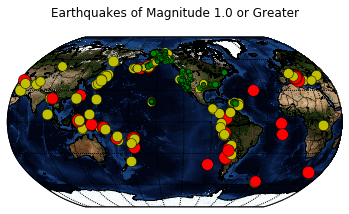

In [ ]:
%matplotlib inline
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import csv
from pandas import Series, DataFrame
import pandas as pd

#Set up colouring of plots
def get_marker_color(magnitude):
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

#Create Map with plots
def Earthquake():
    data = pd.read_csv('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv')
    reader = DataFrame(data,columns = ['latitude','longitude','mag'])

    lats, lons, mags = [], [], []

    lats = reader["latitude"].tolist()
    lons = reader["longitude"].tolist()
    magnitudes = reader["mag"].tolist()
    
    eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
    eq_map.drawcoastlines()
    eq_map.drawcountries()
    eq_map.bluemarble()
    eq_map.drawmapboundary()
    eq_map.drawmeridians(np.arange(0, 360, 30))
    eq_map.drawparallels(np.arange(-90, 90, 30))
 
    min_marker_size = 2.25
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = eq_map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        eq_map.plot(x, y, marker_string, markersize=msize)
    
    title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
    plt.title(title_string)
    plt.show()

#Automatically update
def update():
    while True:
        Earthquake()
        time.sleep(3600)
update()